In [2]:
import json
import glob
import pandas as pd
from pandas import json_normalize

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score #average_precision_score

In [3]:
# import all json --> pandas df

In [5]:
#test_files = "translate_testfive/Homo_sapiens_cdna_abinitio_04_dayhoff_k9_refHsapiens_QfO_t1e8.json"
test_file = "translate_testfive/Homo_sapiens_ncRNA_05_protein_k9_refsprot_t1e9.json"

with open(test_file) as f:
  testdata = json.load(f)

In [6]:
testdata

{'input_files': ['/home/ntpierce/2020-simulate-rnaseq/QfO_vertebrates/simulate_reads/Homo_sapiens_ncRNA/Homo_sapiens_ncRNA_s100_05.fq.gz'],
 'jaccard_info': {'count': 106.0,
  'mean': 0.05045142769486994,
  'std': 0.19836500272378024,
  'min': 0.0,
  '25%': 0.0,
  '50%': 0.0,
  '75%': 0.0,
  'max': 1.0},
 'categorization_counts': {'Translation is shorter than peptide k-mer size + 1': 0,
  'Translation frame has stop codon(s)': 32,
  'Coding': 5,
  'Non-coding': 63,
  'Low complexity nucleotide': 0,
  'Read length was shorter than 3 * peptide k-mer size': 0,
  'Low complexity peptide in protein20 alphabet': 0},
 'categorization_percentages': {'Translation is shorter than peptide k-mer size + 1': 0.0,
  'Translation frame has stop codon(s)': 32.0,
  'Coding': 5.0,
  'Non-coding': 63.0,
  'Low complexity nucleotide': 0.0,
  'Read length was shorter than 3 * peptide k-mer size': 0.0,
  'Low complexity peptide in protein20 alphabet': 0.0},
 'histogram_n_coding_frames_per_read': {'Number of 

In [7]:
testdf = json_normalize(testdata)
testdf.head()

input_files  \
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   

                                peptide_bloom_filter peptide_alphabet  \
0  output_simreads/sencha/index/refsprot_t1e9_pro...          protein   

   peptide_ksize  jaccard_threshold  jaccard_info.count  jaccard_info.mean  \
0              9                0.5               106.0           0.050451   

   jaccard_info.std  jaccard_info.min  jaccard_info.25%  ...  \
0          0.198365               0.0               0.0  ...   

   categorization_counts.Low complexity peptide in protein20 alphabet  \
0                                                  0                    

   categorization_percentages.Translation is shorter than peptide k-mer size + 1  \
0                                                0.0                               

   categorization_percentages.Translation frame has stop codon(s)  \
0                                               32.0                

   categorization_percentages.Coding  categorization_percentages.Non-coding  \
0                                5.0                                   63.0   

   categorization_percentages.Low complexity nucleotide  \
0                                                0.0      

   categorization_percentages.Read length was shorter than 3 * peptide k-mer size  \
0                                                0.0                                

   categorization_percentages.Low complexity peptide in protein20 alphabet  \
0                                                0.0                         

   histogram_n_coding_frames_per_read.Number of reads with 1 putative protein-coding translations  \
0                                                  5                                                

   histogram_n_coding_frames_per_read_percentages.Number of reads with 1 putative protein-coding translations  
0                                              100.0                                                           

[1 rows x 29 columns]

In [8]:
def build_summary_df(filename_list):
    all_info=[]
    for fi in filename_list:
        with open(fi) as f:
            all_info.append(json_normalize(json.load(f)))
    return all_info
            
import glob
#ncRNA = glob.glob("translate_testfive/*ncRNA_01*json")
#qfo_dna = glob.glob("translate_testfive/*qfo_dna_01*json")
#ncRNA = glob.glob("translate_testfive/*ncRNA*json")
#qfo_dna = glob.glob("translate_testfive/*qfo_dna*json")
#ncRNA = glob.glob("translate_Hsapiens/*ncRNA*json")
#qfo_dna = glob.glob("translate_Hsapiens/*qfo_dna*json")

#ncRNA = glob.glob("translate_s100/Homo_sapiens*ncRNA*json")
#qfo_dna = glob.glob("translate_s100/Homo_sapiens*qfo_dna*json")

ncRNA = glob.glob("translate_s100/*ncRNA*json")
qfo_dna = glob.glob("translate_s100/*qfo_dna*json")

filename_list = ncRNA + qfo_dna

In [9]:
len(filename_list)

40250

In [10]:
summaryInfo = build_summary_df(filename_list)

In [11]:
summaryDF = pd.concat(summaryInfo).fillna(0)

In [12]:
summaryDF.head()

input_files  \
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   

                                peptide_bloom_filter   peptide_alphabet  \
0  output_simreads/sencha/index/refsprot_t1e9_day...            dayhoff   
0  output_simreads/sencha/index/refsprot_t1e9_day...            dayhoff   
0  output_simreads/sencha/index/refHsapiens_QfO_t...            protein   
0  output_simreads/sencha/index/refsprot_t1e9_hp_...  hydrophobic-polar   
0  output_simreads/sencha/index/refHsapiens_QfO_t...            dayhoff   

   peptide_ksize  jaccard_threshold  jaccard_info.count  jaccard_info.mean  \
0             17               0.55               113.0           0.013879   
0              9               0.55               114.0           0.934613   
0             12               0.50               121.0           0.005361   
0             13               0.80               145.0           0.984608   
0             10               0.55               125.0           0.587650   

   jaccard_info.std  jaccard_info.min  jaccard_info.25%  ...  \
0          0.073127          0.000000          0.000000  ...   
0          0.113398          0.433333          0.882919  ...   
0          0.058968          0.000000          0.000000  ...   
0          0.052948          0.675676          1.000000  ...   
0          0.253690          0.000000          0.411765  ...   

   histogram_n_coding_frames_per_read_percentages.Number of reads with 3 putative protein-coding translations  \
0                                           0.000000                                                            
0                                          10.447761                                                            
0                                           0.000000                                                            
0                                          12.500000                                                            
0                                           1.923077                                                            

   histogram_n_coding_frames_per_read_percentages.Number of reads with 4 putative protein-coding translations  \
0                                           0.000000                                                            
0                                           7.462687                                                            
0                                           0.000000                                                            
0                                           2.777778                                                            
0                                           1.923077                                                            

   categorization_counts.Low complexity peptide in protein20 alphabet  \
0                                                0.0                    
0                                                0.0                    
0                                                0.0                    
0                                                0.0                    
0                                                0.0                    

   categorization_percentages.Low complexity peptide in protein20 alphabet  \
0                                                0.0                         
0                                                0.0                         
0                                                0.0                         
0                                                0.0                         
0                                                0.0                         

   categorization_counts.Low complexity peptide in hp2 alphabet  \
0                                                0.0              

In [13]:
summaryDF.columns

Index(['input_files', 'peptide_bloom_filter', 'peptide_alphabet',
       'peptide_ksize', 'jaccard_threshold', 'jaccard_info.count',
       'jaccard_info.mean', 'jaccard_info.std', 'jaccard_info.min',
       'jaccard_info.25%', 'jaccard_info.50%', 'jaccard_info.75%',
       'jaccard_info.max',
       'categorization_counts.Translation is shorter than peptide k-mer size + 1',
       'categorization_counts.Translation frame has stop codon(s)',
       'categorization_counts.Coding', 'categorization_counts.Non-coding',
       'categorization_counts.Low complexity nucleotide',
       'categorization_counts.Read length was shorter than 3 * peptide k-mer size',
       'categorization_counts.Low complexity peptide in dayhoff6 alphabet',
       'categorization_percentages.Translation is shorter than peptide k-mer size + 1',
       'categorization_percentages.Translation frame has stop codon(s)',
       'categorization_percentages.Coding',
       'categorization_percentages.Non-coding',
       '

In [14]:
summaryDF.head()

input_files  \
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   

                                peptide_bloom_filter   peptide_alphabet  \
0  output_simreads/sencha/index/refsprot_t1e9_day...            dayhoff   
0  output_simreads/sencha/index/refsprot_t1e9_day...            dayhoff   
0  output_simreads/sencha/index/refHsapiens_QfO_t...            protein   
0  output_simreads/sencha/index/refsprot_t1e9_hp_...  hydrophobic-polar   
0  output_simreads/sencha/index/refHsapiens_QfO_t...            dayhoff   

   peptide_ksize  jaccard_threshold  jaccard_info.count  jaccard_info.mean  \
0             17               0.55               113.0           0.013879   
0              9               0.55               114.0           0.934613   
0             12               0.50               121.0           0.005361   
0             13               0.80               145.0           0.984608   
0             10               0.55               125.0           0.587650   

   jaccard_info.std  jaccard_info.min  jaccard_info.25%  ...  \
0          0.073127          0.000000          0.000000  ...   
0          0.113398          0.433333          0.882919  ...   
0          0.058968          0.000000          0.000000  ...   
0          0.052948          0.675676          1.000000  ...   
0          0.253690          0.000000          0.411765  ...   

   histogram_n_coding_frames_per_read_percentages.Number of reads with 3 putative protein-coding translations  \
0                                           0.000000                                                            
0                                          10.447761                                                            
0                                           0.000000                                                            
0                                          12.500000                                                            
0                                           1.923077                                                            

   histogram_n_coding_frames_per_read_percentages.Number of reads with 4 putative protein-coding translations  \
0                                           0.000000                                                            
0                                           7.462687                                                            
0                                           0.000000                                                            
0                                           2.777778                                                            
0                                           1.923077                                                            

   categorization_counts.Low complexity peptide in protein20 alphabet  \
0                                                0.0                    
0                                                0.0                    
0                                                0.0                    
0                                                0.0                    
0                                                0.0                    

   categorization_percentages.Low complexity peptide in protein20 alphabet  \
0                                                0.0                         
0                                                0.0                         
0                                                0.0                         
0                                                0.0                         
0                                                0.0                         

   categorization_counts.Low complexity peptide in hp2 alphabet  \
0                                                0.0              

In [15]:
#summaryDF[["input_files", "peptide_alphabet", "peptide_ksize", 'categorization_percentages.Coding', 'categorization_percentages.Non-coding']]

In [16]:
summaryDF["total_reads"] = summaryDF.groupby((summaryDF.columns.str.split(".").str[0].str.contains("categorization_counts")),axis=1).sum()[True]

In [17]:
summaryDF["categorization_percentages.Coding"].tail()

0    18.0
0    89.0
0    98.0
0    96.0
0    77.0
Name: categorization_percentages.Coding, dtype: float64

In [18]:
summaryDF["categorization_percentages.Non-coding"].head()

0    64.0
0     1.0
0    62.0
0     1.0
0    25.0
Name: categorization_percentages.Non-coding, dtype: float64

In [56]:
#A true positive is an outcome where the model correctly predicts the positive class. 
#Similarly, a true negative is an outcome where the model correctly predicts the negative class
#A false positive is an outcome where the model incorrectly predicts the positive class.
#And a false negative is an outcome where the model incorrectly predicts the negative class.
# positive class = "coding"
# TP = "coding" FP = "total" - "coding"
# negative class = "non-coding"
# TN = "non-coding" FN= "total" - "non-coding" except NOT. Actually = "total - coding"
# bc there are other classes, but it really is coding = coding, everything else = non-coding
import re

def find_origin(row):
    if "qfo" in row["input_files"][0]:
        row["origin"] = "coding"
        row["true_positives"] = row["categorization_counts.Coding"]
        row["true_negatives"] = 0
        row["false_positives"] = 0
        row["false_negatives"] = row["total_reads"] - row["categorization_counts.Coding"]
        input_file = row["input_files"][0]
        row["species"] = re.search("(\w*)_qfo", input_file).groups()[0].replace("_", " ")
    elif "ncRNA" in row["input_files"][0]:
        row["origin"] = "noncoding"
        row["true_positives"] = 0
        row["true_negatives"] = row["total_reads"] - row["categorization_counts.Coding"]
        row["false_positives"] = row["categorization_counts.Coding"]
        row["false_negatives"]= 0
        input_file = row["input_files"][0]
        row["species"] = re.search("(\w*)_ncRNA", input_file).groups()[0].replace("_", " ")
        #row["species"] = row["input_files"].str.extract("(\w*)_ncRNA")[0]
    if "Hsapiens" in row["peptide_bloom_filter"]:
        row["peptide_reference"] = "Homo sapiens QfO"
    elif "sprot" in row["peptide_bloom_filter"]:
        row["peptide_reference"] = "Swiss Prot"
    return row

summaryDF = summaryDF.apply(find_origin, axis=1)

In [57]:
#now we should add divergence time
#species_metadata= https://docs.google.com/spreadsheets/d/1dCT8IXTdlAuz7mng97x3T5vxiY5KllbYYXFNzP0H0Vc/edit#gid=1807612802
species_metadata = pd.read_csv("species_metadata.csv")
#dtime = pd.read_csv("divergence_time.txt")

In [62]:
species_metadata.head()

proteome_id  tax_id oscode  n_main_fasta_canonical  \
0  UP000005640    9606  HUMAN                   21146   
1  UP000002277    9598  PANTR                   23006   
2  UP000001519    9595  GORGO                   21795   
3  UP000000589   10090  MOUSE                   22287   
4  UP000002494   10116    RAT                   21678   

   n_additional_fasta_isoforms  n_gene2acc  \
0                        74769       96332   
1                        25788       49266   
2                        22932       44943   
3                        40369       63134   
4                         9885       32629   

                                        species_name  \
0                               Homo sapiens (Human)   
1                       Pan troglodytes (Chimpanzee)   
2  Gorilla gorilla gorilla (Western lowland gorilla)   
3                               Mus musculus (Mouse)   
4                            Rattus norvegicus (Rat)   

   divergence_from_human_mya          scientific_name    common_name_or_strain  
0                       0.00             Homo sapiens                    Human  
1                       6.70          Pan troglodytes               Chimpanzee  
2                       9.06  Gorilla gorilla gorilla  Western lowland gorilla  
3                      90.00             Mus musculus                    Mouse  
4                      90.00        Rattus norvegicus                      Rat

In [66]:
species_metadata[["scientific_name", "divergence_from_human_mya"]]

scientific_name  divergence_from_human_mya
0                       Homo sapiens                       0.00
1                    Pan troglodytes                       6.70
2            Gorilla gorilla gorilla                       9.06
3                       Mus musculus                      90.00
4                  Rattus norvegicus                      90.00
..                               ...                        ...
73           Streptomyces coelicolor                    4290.00
74                 Synechocystis sp.                    4290.00
75         Thermococcus kodakarensis                    4290.00
76  Thermodesulfovibrio yellowstonii                    4290.00
77               Thermotoga maritima                    4290.00

[78 rows x 2 columns]

In [73]:
summaryDF=summaryDF.merge(species_metadata[["scientific_name", "divergence_from_human_mya"]], left_on=["species"], right_on=["scientific_name"])

In [72]:
summaryDF.head()

input_files  \
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...   

                                peptide_bloom_filter   peptide_alphabet  \
0  output_simreads/sencha/index/refsprot_t1e9_day...            dayhoff   
0  output_simreads/sencha/index/refsprot_t1e9_day...            dayhoff   
0  output_simreads/sencha/index/refHsapiens_QfO_t...            protein   
0  output_simreads/sencha/index/refsprot_t1e9_hp_...  hydrophobic-polar   
0  output_simreads/sencha/index/refHsapiens_QfO_t...            dayhoff   

   peptide_ksize  jaccard_threshold  jaccard_info.count  jaccard_info.mean  \
0             17               0.55               113.0           0.013879   
0              9               0.55               114.0           0.934613   
0             12               0.50               121.0           0.005361   
0             13               0.80               145.0           0.984608   
0             10               0.55               125.0           0.587650   

   jaccard_info.std  jaccard_info.min  jaccard_info.25%  ...  \
0          0.073127          0.000000          0.000000  ...   
0          0.113398          0.433333          0.882919  ...   
0          0.058968          0.000000          0.000000  ...   
0          0.052948          0.675676          1.000000  ...   
0          0.253690          0.000000          0.411765  ...   

   histogram_n_coding_frames_per_read.Number of reads with 6 putative protein-coding translations  \
0                                                0.0                                                
0                                                0.0                                                
0                                                0.0                                                
0                                                0.0                                                
0                                                0.0                                                

   histogram_n_coding_frames_per_read_percentages.Number of reads with 6 putative protein-coding translations  \
0                                                0.0                                                            
0                                                0.0                                                            
0                                                0.0                                                            
0                                                0.0                                                            
0                                                0.0                                                            

   total_reads     origin  true_positives  true_negatives  false_positives  \
0        100.0  noncoding               0            99.0                1   
0        100.0  noncoding               0            33.0               67   
0        100.0  noncoding               0            99.0                1   
0        100.0  noncoding               0            28.0               72   
0        100.0  noncoding               0            48.0               52   

   false_negatives                  species  peptide_reference  
0              0.0  Gorilla gorilla gorilla         Swiss Prot  
0              0.0        Rattus norvegicus         Swiss Prot  
0              0.0               Bos taurus   Homo sapiens QfO  
0              0.0   Canis lupus familiaris         Swiss Prot  
0              0.0          Oryzias latipes   Homo sapiens QfO  

[5 rows x 51 columns]

In [60]:
summaryDF.iloc[0]["input_files"][0]

'/home/ntpierce/2020-simulate-rnaseq/QfO_vertebrates/simulate_reads/Gorilla_gorilla_gorilla_ncRNA/Gorilla_gorilla_gorilla_ncRNA_s100_01.fq.gz'

In [74]:
summaryDF[["input_files", "origin","species", "divergence_from_human_mya", "peptide_alphabet", "peptide_ksize", 'categorization_percentages.Coding', 'categorization_percentages.Non-coding', "true_positives"]].head()

input_files     origin  \
0  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...  noncoding   
1  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...  noncoding   
2  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...  noncoding   
3  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...  noncoding   
4  [/home/ntpierce/2020-simulate-rnaseq/QfO_verte...  noncoding   

                   species  divergence_from_human_mya   peptide_alphabet  \
0  Gorilla gorilla gorilla                       9.06            dayhoff   
1  Gorilla gorilla gorilla                       9.06  hydrophobic-polar   
2  Gorilla gorilla gorilla                       9.06            dayhoff   
3  Gorilla gorilla gorilla                       9.06            dayhoff   
4  Gorilla gorilla gorilla                       9.06            dayhoff   

   peptide_ksize  categorization_percentages.Coding  \
0             17                                1.0   
1             33                                0.0   
2             11                               14.0   
3             25                                0.0   
4              9                               68.0   

   categorization_percentages.Non-coding  true_positives  
0                                   64.0               0  
1                                   32.0               0  
2                                   57.0               0  
3                                   52.0               0  
4                                    0.0               0

In [80]:
# let's check - for *01* files, there should be two files in each group (one from coding reads, one from noncoding)
# if including replicates (5) -- should be 10 files in each group
# actually probably want to compute metrics INDEPENDENTLY for each replicate set
summaryDF.groupby(["species", "divergence_from_human_mya", "peptide_alphabet", "peptide_ksize", "peptide_bloom_filter", "jaccard_threshold"]).count()

input_files  \
species            divergence_from_human_mya peptide_alphabet peptide_ksize peptide_bloom_filter                               jaccard_threshold                
Bos taurus         96.0                      dayhoff          5             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                        10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_dayh... 0.50                        10   
                                                              7             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                        10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_dayh... 0.50                        10   
                                                              9             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.45                        10   
...                                                                                                                                                       ...   
Xenopus tropicalis 351.8                     protein          19            output_simreads/sencha/index/refsprot_t1e9_prot... 0.50                        10   
                                                              21            output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                        10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_prot... 0.50                        10   
                                                              23            output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                        10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_prot... 0.50                        10   

                                                                                                                                                  jaccard_info.count  \
species            divergence_from_human_mya peptide_alphabet peptide_ksize peptide_bloom_filter                               jaccard_threshold                       
Bos taurus         96.0                      dayhoff          5             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                               10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_dayh... 0.50                               10   
                                                              7             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                               10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_dayh... 0.50                               10   
                                                              9             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.45                               10   
...                                                                                                                                                              ...   
Xenopus tropicalis 351.8                     protein          19            output_simreads/sencha/index/refsprot_t1e9_prot... 0.50                               10   
                                                              21            output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                               10   
                                                                            output_simreads/sencha/index/refsprot_t1e9_prot... 0.50                               10   
                                                              23            output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                               10   
                                    

In [23]:
# want to combine values of true pos, true neg, false pos, false neg values
#new multindex dataframe with true pos, true neg, false pos, false neg columns, precision, recall, f1 score


In [87]:
metricDF = summaryDF.groupby(["species", "divergence_from_human_mya", "peptide_alphabet", "peptide_reference", "peptide_ksize", "peptide_bloom_filter","jaccard_threshold"]).sum()[["true_positives", "true_negatives", "false_positives", "false_negatives"]]

In [88]:
summaryDF.loc[(summaryDF["peptide_alphabet"]=="dayhoff") & (summaryDF["peptide_ksize"]==13)]["categorization_percentages.Coding"]

# first read: 54% non-coding, 11% coding, 35% other. might need to keep other categories for good f1 score?

17        2.0
46        5.0
60        5.0
67       11.0
137       4.0
         ... 
40103    36.0
40121    51.0
40164    60.0
40183    58.0
40234    51.0
Name: categorization_percentages.Coding, Length: 1227, dtype: float64

In [89]:
# look at numbers per bloom filter
#summaryDF.groupby(["peptide_bloom_filter"]).sum()[["true_positives", "true_negatives", "false_positives", "false_negatives"]]

In [90]:
# precision = TP/ (TP + FP)
# recall = TP/ (TP + FN)
# F1 = 2 * (precision * recall) / (precision + recall)

In [91]:
metricDF["precision"] = metricDF["true_positives"]/(metricDF["true_positives"] + metricDF["false_positives"])
metricDF["recall"] = metricDF["true_positives"]/(metricDF["true_positives"] + metricDF["false_negatives"])
metricDF["F1_score"] = 2 * ((metricDF["precision"] * metricDF["recall"]) / (metricDF["precision"] + metricDF["recall"]))

In [92]:
metricDF.head()

true_positives  \
species    divergence_from_human_mya peptide_alphabet peptide_reference peptide_ksize peptide_bloom_filter                               jaccard_threshold                   
Bos taurus 96.0                      dayhoff          Homo sapiens QfO  5             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                          495   
                                                                        7             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                          495   
                                                                        9             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.45                          494   
                                                                                                                                         0.50                          493   
                                                                                                                                         0.55                          492   

                                                                                                                                                            true_negatives  \
species    divergence_from_human_mya peptide_alphabet peptide_reference peptide_ksize peptide_bloom_filter                               jaccard_threshold                   
Bos taurus 96.0                      dayhoff          Homo sapiens QfO  5             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                        181.0   
                                                                        7             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                        181.0   
                                                                        9             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.45                        194.0   
                                                                                                                                         0.50                        195.0   
                                                                                                                                         0.55                        196.0   

                                                                                                                                                            false_positives  \
species    divergence_from_human_mya peptide_alphabet peptide_reference peptide_ksize peptide_bloom_filter                               jaccard_threshold                    
Bos taurus 96.0                      dayhoff          Homo sapiens QfO  5             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                           319   
                                                                        7             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50                           319   
                                                                        9             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.45                           306   
                                                                                                                                         0.50                           305   
                                                                                                                                         0.55                           304   

                                                                                                                                                            false_negatives  \
species    divergence_from_human_mya peptide_alphabet peptide_reference peptide_ksize peptide_bloom_filter                               jaccard_threshold                    
Bos taurus 96.0                      dayhoff          Homo sapiens QfO  5             output_simreads/sencha/index/refHsapiens_QfO_t1... 0.50 

In [93]:
print("max_f1score: " + str(metricDF["F1_score"].max()))
print("min_f1score: " + str(metricDF["F1_score"].min()))
print("max_precision: " + str(metricDF["precision"].max()))
print("min_precision: " + str(metricDF["precision"].min()))
print("max_recall: " + str(metricDF["recall"].max()))
print("min_recall: " + str(metricDF["recall"].min()))

max_f1score: 0.9644970414201183
min_f1score: 0.042884990253411304
max_precision: 1.0
min_precision: 0.0
max_recall: 0.998
min_recall: 0.0


In [579]:
# NOW, PLOTTING!

In [94]:
plotDF = metricDF.reset_index()

In [95]:
plotDF.to_csv("QfO_vertebrates_s100_sencha_translate_summaries.csv")

In [32]:
#plotDF["peptide_reference"] = plotDF["peptide_bloom_filter"].str.extract

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

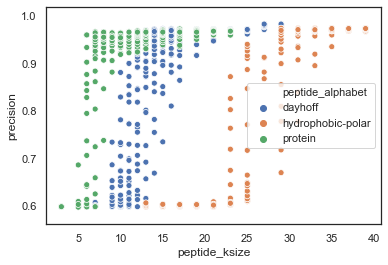

In [98]:

HsapiensDF = plotDF[(plotDF["species"] == "Homo sapiens")]
sns.scatterplot(x="peptide_ksize", y="precision", data=HsapiensDF, hue="peptide_alphabet" )#, style="jaccard_threshold", legend="full")

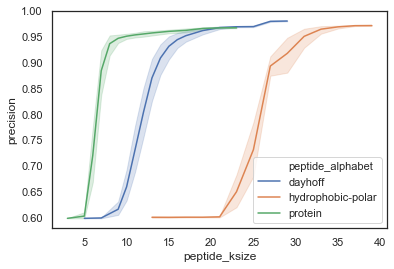

In [99]:
sns.lineplot(x="peptide_ksize", y="precision", data=HsapiensDF, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

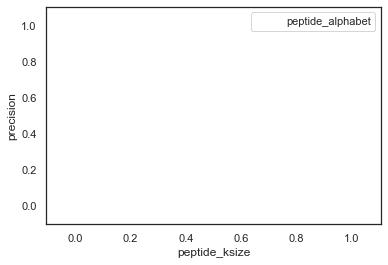

In [100]:
sns.lineplot(x="peptide_ksize", y="precision", data=plotDF[(plotDF["species"] == "Bos_taurus")], hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

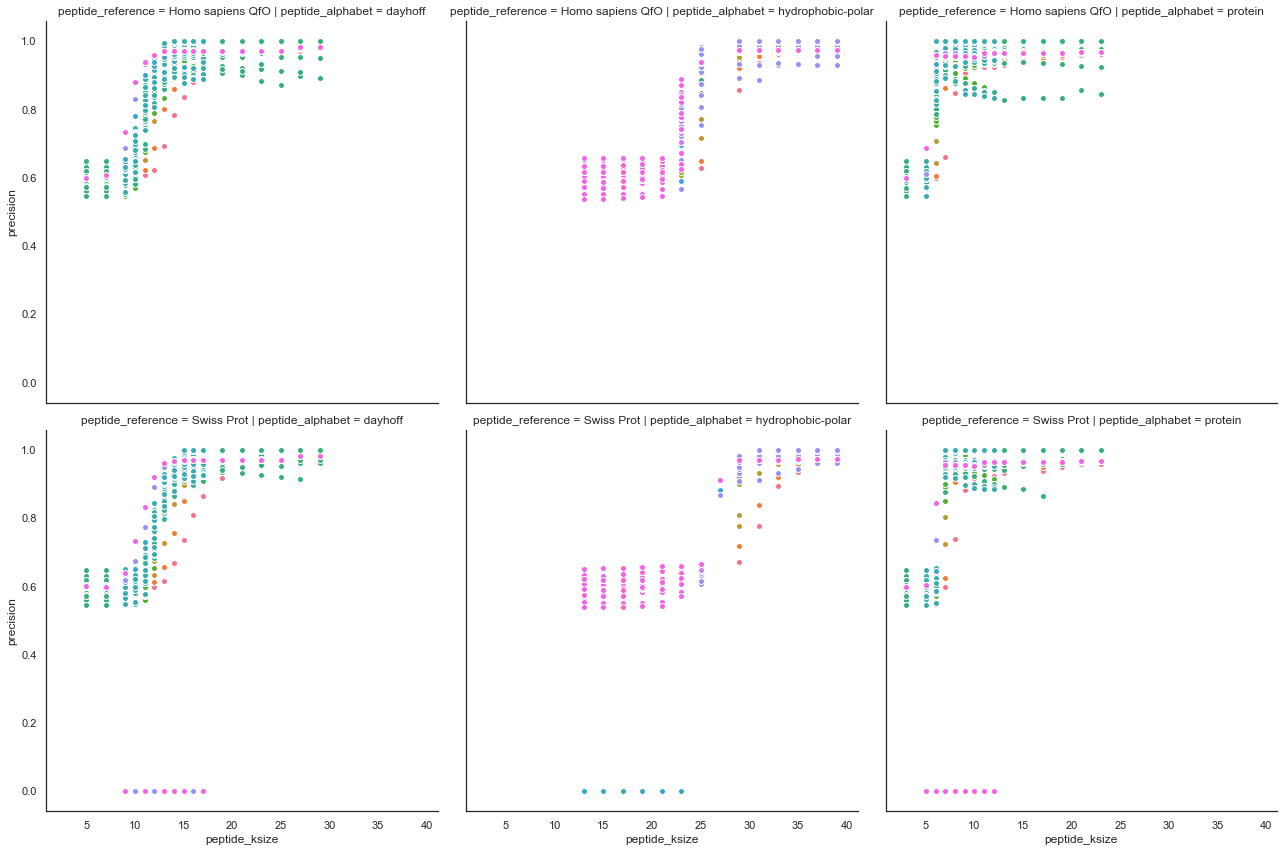

In [101]:
#g = sns.FacetGrid(plotDF, row="peptide_reference", col="jaccard_threshold", hue="peptide_alphabet", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
g = sns.FacetGrid(plotDF, row="peptide_reference", col="peptide_alphabet", hue="jaccard_threshold", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
g = g.map(plt.scatter, "peptide_ksize", "precision", edgecolor="w")

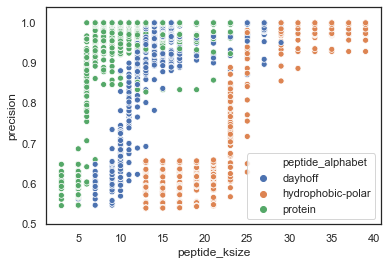

In [102]:
sns.scatterplot(x="peptide_ksize", y="precision", data=plotDF.loc[plotDF["peptide_reference"] == "Homo sapiens QfO"], hue="peptide_alphabet")#, style="jaccard_threshold", legend=False)

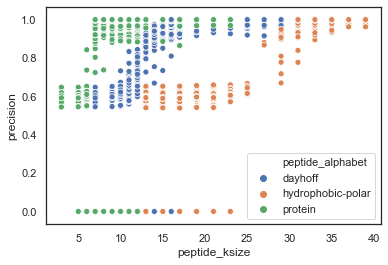

In [103]:
sns.scatterplot(x="peptide_ksize", y="precision", data=plotDF.loc[plotDF["peptide_reference"] == "Swiss Prot"], hue="peptide_alphabet")#, style="jaccard_threshold", legend=False)


In [104]:
# let's grab just default thresholds
#df[df['first_name'].notnull() & (df['nationality'] == "USA")]
#defaultThresholds=
proteinDF = plotDF[(plotDF["jaccard_threshold"] == 0.5) & (plotDF['peptide_alphabet'] =="protein")]
dayhoffDF = plotDF[(plotDF["jaccard_threshold"] == 0.5) & (plotDF['peptide_alphabet'] =="dayhoff")]
hpDF = plotDF[(plotDF["jaccard_threshold"] == 0.8) & (plotDF['peptide_alphabet'] =="hydrophobic-polar")]
defaultThresholds = pd.concat([proteinDF, dayhoffDF, hpDF])


#in ["protein", "dayhoff"])]
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]


In [105]:
defaultThresholds

species  divergence_from_human_mya   peptide_alphabet  \
150           Bos taurus                       96.0            protein   
152           Bos taurus                       96.0            protein   
156           Bos taurus                       96.0            protein   
160           Bos taurus                       96.0            protein   
164           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
150   Homo sapiens QfO              3   
152   Homo sapiens QfO              5   
156   Homo sapiens QfO              6   
160   Homo sapiens QfO              7   
164   Homo sapiens QfO              8   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
150   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
152   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
160   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
164   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
150              495           181.0              319              5.0   
152              495           181.0              319              5.0   
156              380           438.0               62            120.0   
160              238           492.0                8            262.0   
164              206           493.0                7            294.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
150    0.608108   0.990  0.753425  
152    0.608108   0.990  0.753425  
156    0.859729   0.760  0.806794  
160    0.967480   0.476  0.638070  
164    0.967136   0.412  0.577840  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[1171 rows x 14 columns]

In [106]:
hpDF

species  divergence_from_human_mya   peptide_alphabet  \
89            Bos taurus                       96.0  hydrophobic-polar   
93            Bos taurus                       96.0  hydrophobic-polar   
97            Bos taurus                       96.0  hydrophobic-polar   
101           Bos taurus                       96.0  hydrophobic-polar   
105           Bos taurus                       96.0  hydrophobic-polar   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
89    Homo sapiens QfO             13   
93    Homo sapiens QfO             15   
97    Homo sapiens QfO             17   
101   Homo sapiens QfO             19   
105   Homo sapiens QfO             21   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
89    output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
93    output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
97    output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
101   output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
105   output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
89               446           203.0              297             54.0   
93               446           204.0              296             54.0   
97               444           204.0              296             56.0   
101              444           215.0              285             56.0   
105              442           230.0              270             58.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
89     0.600269   0.892  0.717619  
93     0.601078   0.892  0.718196  
97     0.600000   0.888  0.716129  
101    0.609053   0.888  0.722539  
105    0.620787   0.884  0.729373  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[339 rows x 14 columns]

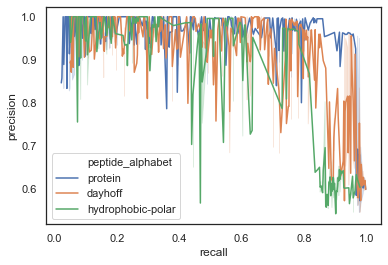

In [107]:
sns.lineplot(x="recall", y="precision", data=defaultThresholds, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

In [44]:
#g = sns.FacetGrid(plotDF, row="peptide_reference", col="jaccard_threshold", hue="peptide_alphabet", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
#g = g.map(plt.plot, "peptide_ksize", "precision", edgecolor="w")

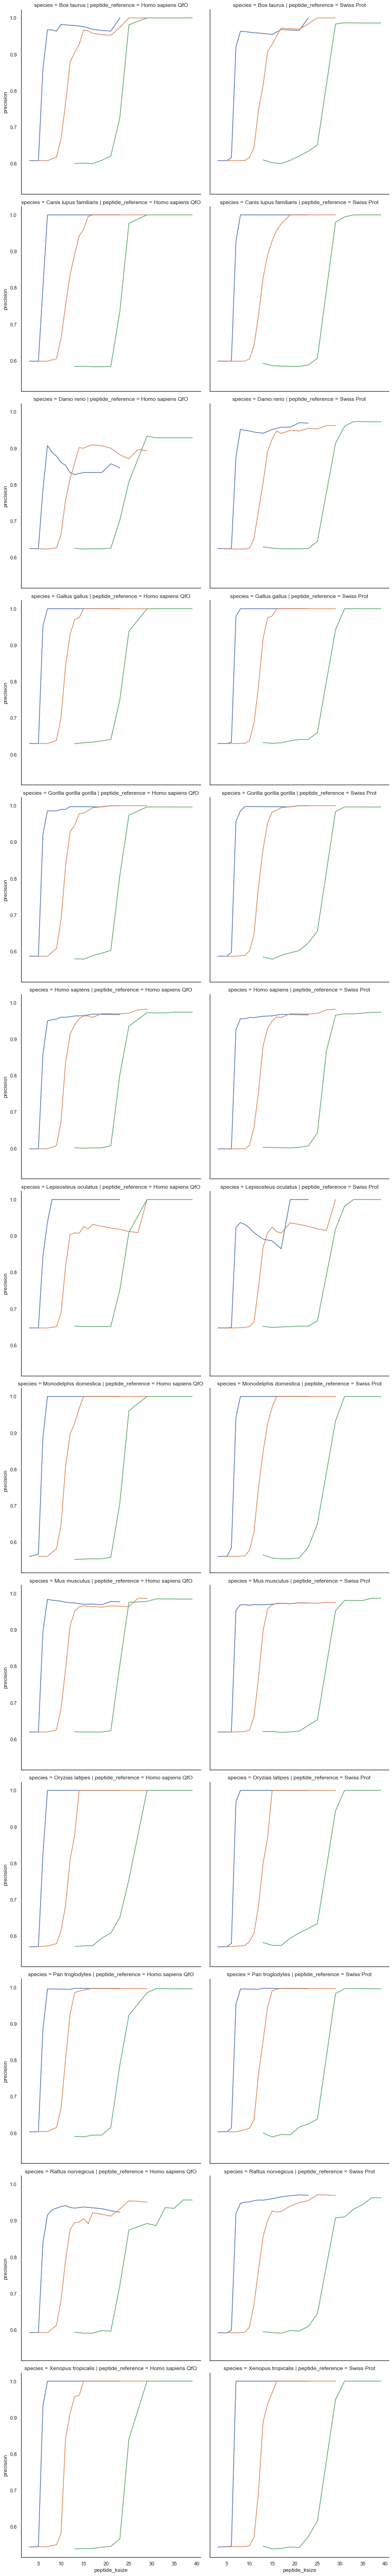

In [108]:
g = sns.FacetGrid(defaultThresholds, row= "species", col="peptide_reference", hue="peptide_alphabet", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
#g = g.map(plt.scatter, "peptide_ksize", "precision", edgecolor="w")
g = g.map(plt.plot, "peptide_ksize", "precision") #, edgecolor="w")

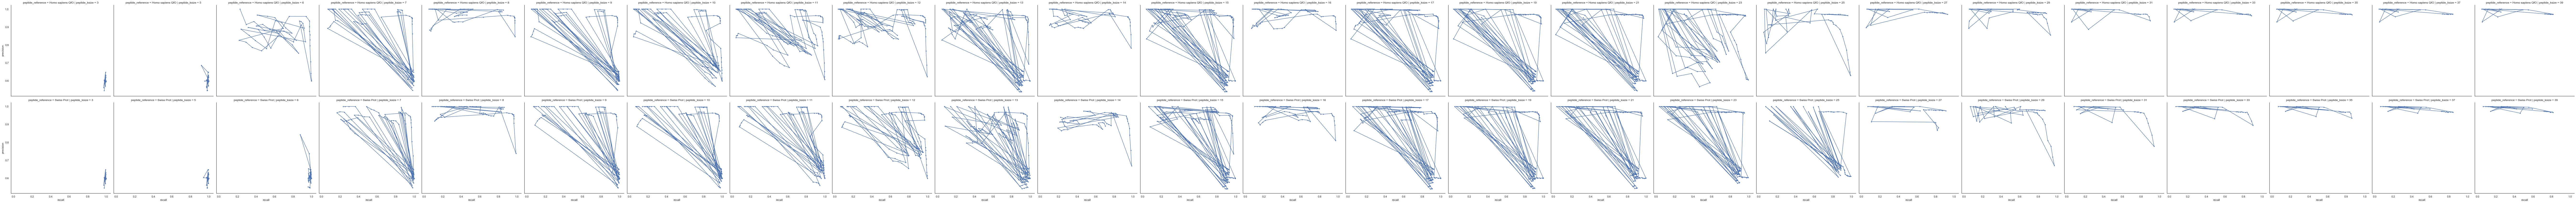

In [109]:
#defaultThresholds=plotDF.loc[plotDF["jaccard_threshold"] == 0.5]
#g = sns.FacetGrid(defaultThresholds,col="peptide_ksize", row= "peptide_reference",height=6, aspect=1)#, height=2)
g = sns.FacetGrid(plotDF,col="peptide_ksize", row= "peptide_reference",height=6, aspect=1)
g = g.map(plt.plot, "recall", "precision", marker=".")
# weird patterns are a result of having all thresholds in same plot - need to break out

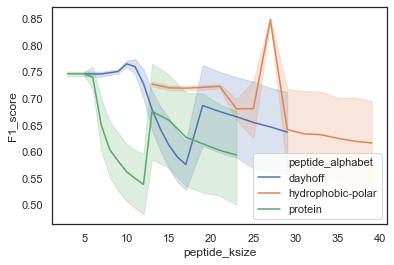

In [110]:
#F1 score vs peptide_ksize
sns.lineplot(x="peptide_ksize", y="F1_score", data=plotDF, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

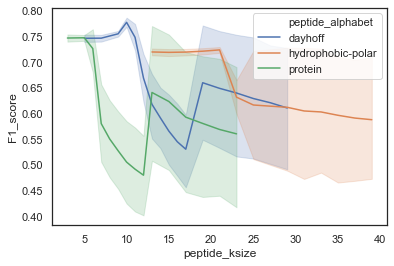

In [111]:
Hsapiens_ref = plotDF.loc[plotDF["peptide_reference"] == "Homo sapiens QfO"]
Sprot_ref = plotDF.loc[plotDF["peptide_reference"] == "Swiss Prot"]
#defaultThresholds=plotDF.loc[plotDF["jaccard_threshold"] == 0.5]
sns.lineplot(x="peptide_ksize", y="F1_score", data=Hsapiens_ref, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

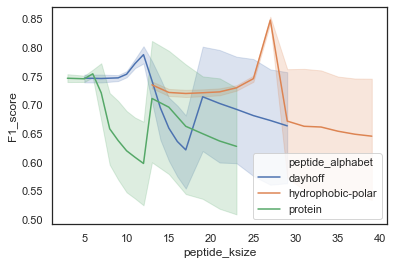

In [112]:
Sprot_ref = plotDF.loc[plotDF["peptide_reference"] == "Swiss Prot"]
#defaultThresholds=plotDF.loc[plotDF["jaccard_threshold"] == 0.5]
sns.lineplot(x="peptide_ksize", y="F1_score", data=Sprot_ref, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

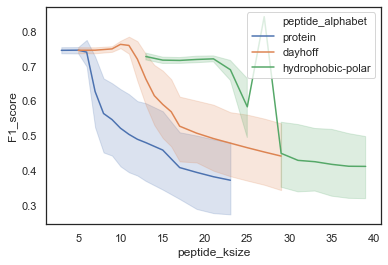

In [113]:
# to do: better select-threshold
sns.lineplot(x="peptide_ksize", y="F1_score", data=defaultThresholds, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

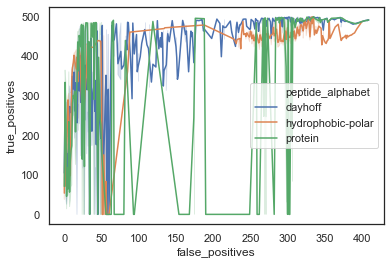

In [114]:
# this isn't very informative - would need rate (%) though here I know total for each - (coding: 500, nc: 500)
sns.lineplot(x="false_positives", y="true_positives", data=Sprot_ref, hue="peptide_alphabet")

In [115]:
defaultThresholds

species  divergence_from_human_mya   peptide_alphabet  \
150           Bos taurus                       96.0            protein   
152           Bos taurus                       96.0            protein   
156           Bos taurus                       96.0            protein   
160           Bos taurus                       96.0            protein   
164           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
150   Homo sapiens QfO              3   
152   Homo sapiens QfO              5   
156   Homo sapiens QfO              6   
160   Homo sapiens QfO              7   
164   Homo sapiens QfO              8   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
150   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
152   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
160   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
164   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
150              495           181.0              319              5.0   
152              495           181.0              319              5.0   
156              380           438.0               62            120.0   
160              238           492.0                8            262.0   
164              206           493.0                7            294.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
150    0.608108   0.990  0.753425  
152    0.608108   0.990  0.753425  
156    0.859729   0.760  0.806794  
160    0.967480   0.476  0.638070  
164    0.967136   0.412  0.577840  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[1171 rows x 14 columns]

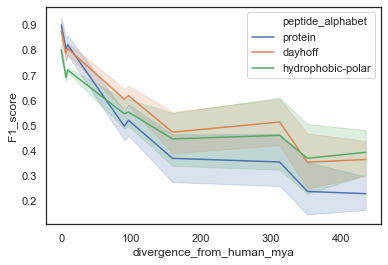

In [121]:
sns.lineplot(x="divergence_from_human_mya", y="F1_score", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"], hue="peptide_alphabet")

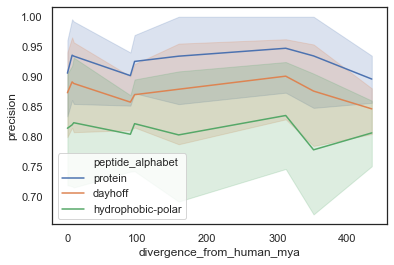

In [119]:
sns.lineplot(x="divergence_from_human_mya", y="precision", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"], hue="peptide_alphabet")

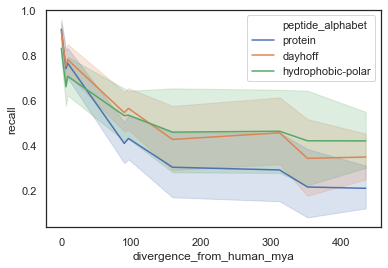

In [120]:
sns.lineplot(x="divergence_from_human_mya", y="recall", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"], hue="peptide_alphabet")

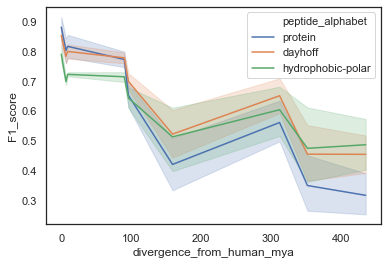

In [122]:
sns.lineplot(x="divergence_from_human_mya", y="F1_score", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Swiss Prot"], hue="peptide_alphabet")

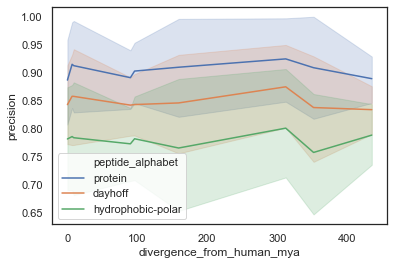

In [123]:
sns.lineplot(x="divergence_from_human_mya", y="precision", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Swiss Prot"], hue="peptide_alphabet")

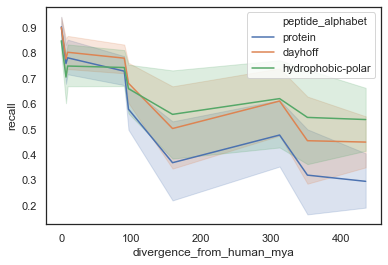

In [124]:
sns.lineplot(x="divergence_from_human_mya", y="recall", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Swiss Prot"], hue="peptide_alphabet")

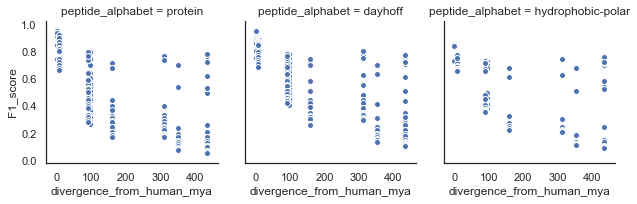

In [139]:
g = sns.FacetGrid(defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"],col="peptide_alphabet")
#g = g.map(plt.plot, "divergence_from_human_mya","F1_score", marker=".")
g = g.map(plt.scatter, "divergence_from_human_mya", "F1_score", edgecolor="w")#, style="peptide_ksize")

In [166]:
defaultThresholds

species  divergence_from_human_mya   peptide_alphabet  \
150           Bos taurus                       96.0            protein   
152           Bos taurus                       96.0            protein   
156           Bos taurus                       96.0            protein   
160           Bos taurus                       96.0            protein   
164           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
150   Homo sapiens QfO              3   
152   Homo sapiens QfO              5   
156   Homo sapiens QfO              6   
160   Homo sapiens QfO              7   
164   Homo sapiens QfO              8   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
150   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
152   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
160   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
164   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
150              495           181.0              319              5.0   
152              495           181.0              319              5.0   
156              380           438.0               62            120.0   
160              238           492.0                8            262.0   
164              206           493.0                7            294.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
150    0.608108   0.990  0.753425  
152    0.608108   0.990  0.753425  
156    0.859729   0.760  0.806794  
160    0.967480   0.476  0.638070  
164    0.967136   0.412  0.577840  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[1171 rows x 14 columns]

In [170]:
#df.loc[df.reset_index().groupby(['F_Type'])['to_date'].idxmax()]
#bestF1 = defaultThresholds[defaultThresholds.groupby(["species"])["F1_score"]].idxmax()]

bestF1=defaultThresholds.loc[defaultThresholds.groupby(["species", "divergence_from_human_mya", "peptide_alphabet", "peptide_reference"])["F1_score"].idxmax()]

In [168]:
#bF1=bestF1.reset_index()

In [171]:
bestF1

species  divergence_from_human_mya   peptide_alphabet  \
7             Bos taurus                       96.0            dayhoff   
59            Bos taurus                       96.0            dayhoff   
105           Bos taurus                       96.0  hydrophobic-polar   
120           Bos taurus                       96.0  hydrophobic-polar   
156           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4098  Xenopus tropicalis                      351.8            dayhoff   
4148  Xenopus tropicalis                      351.8  hydrophobic-polar   
4186  Xenopus tropicalis                      351.8  hydrophobic-polar   
4195  Xenopus tropicalis                      351.8            protein   
4238  Xenopus tropicalis                      351.8            protein   

     peptide_reference  peptide_ksize  \
7     Homo sapiens QfO             10   
59          Swiss Prot             12   
105   Homo sapiens QfO             21   
120         Swiss Prot             13   
156   Homo sapiens QfO              6   
...                ...            ...   
4098        Swiss Prot             11   
4148  Homo sapiens QfO             21   
4186        Swiss Prot             25   
4195  Homo sapiens QfO              5   
4238        Swiss Prot              6   

                                   peptide_bloom_filter  jaccard_threshold  \
7     output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
59    output_simreads/sencha/index/refsprot_t1e9_day...                0.5   
105   output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
120   output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4098  output_simreads/sencha/index/refsprot_t1e9_day...                0.5   
4148  output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
4186  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4195  output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
4238  output_simreads/sencha/index/refsprot_t1e9_pro...                0.5   

      true_positives  true_negatives  false_positives  false_negatives  \
7                479           262.0              238             21.0   
59               448           350.0              150             52.0   
105              442           230.0              270             58.0   
120              479           194.0              306             21.0   
156              380           438.0               62            120.0   
...              ...             ...              ...              ...   
4098             465           152.0              348             35.0   
4148             448           128.0              372             52.0   
4186             440           225.0              275             60.0   
4195             491            91.0              409              9.0   
4238             490            93.0              407             10.0   

      precision  recall  F1_score  
7      0.668061   0.958  0.787182  
59     0.749164   0.896  0.816029  
105    0.620787   0.884  0.729373  
120    0.610191   0.958  0.745525  
156    0.859729   0.760  0.806794  
...         ...     ...       ...  
4098   0.571956   0.930  0.708302  
4148   0.546341   0.896  0.678788  
4186   0.615385   0.880  0.724280  
4195   0.545556   0.982  0.701429  
4238   0.546265   0.980  0.701503  

[78 rows x 14 columns]

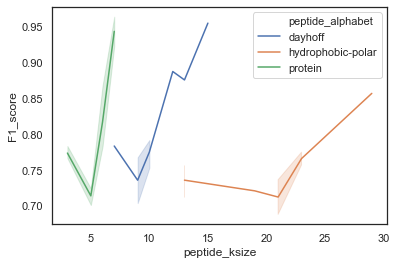

In [177]:
sns.lineplot(data=bestF1.loc[plotDF["peptide_reference"] == "Homo sapiens QfO"], x="peptide_ksize", y="F1_score",hue="peptide_alphabet")

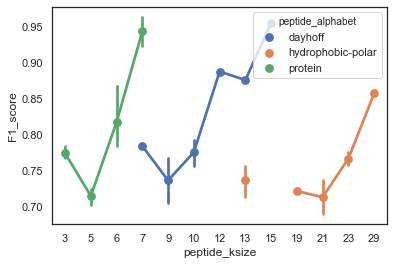

In [181]:
sns.pointplot(data=bestF1.loc[bestF1["peptide_reference"] == "Homo sapiens QfO"], x="peptide_ksize", y="F1_score",hue="peptide_alphabet", edgecolor="w")

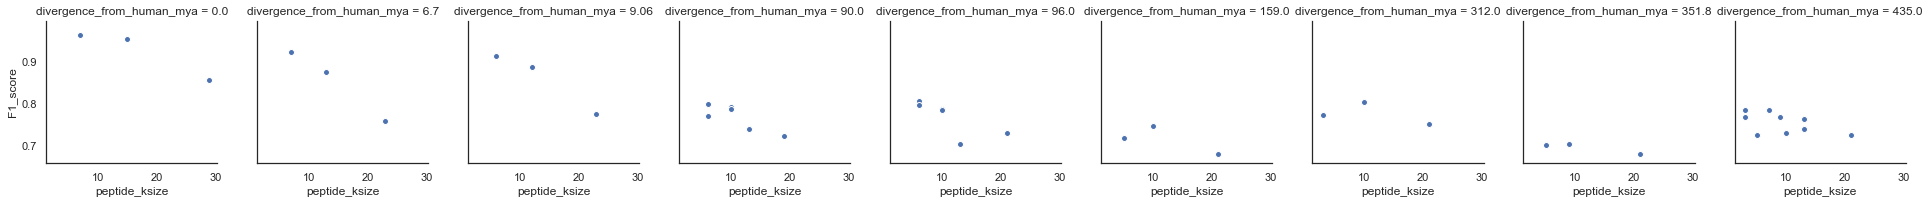

In [184]:
g = sns.FacetGrid(bestF1[bestF1["peptide_reference"]=="Homo sapiens QfO"],col="divergence_from_human_mya")

#g = g.map(plt.plot, "peptide_ksize","F1_score", marker=".")
g = g.map(plt.scatter, "peptide_ksize", "F1_score", edgecolor="w")#, style="peptide_ksize")

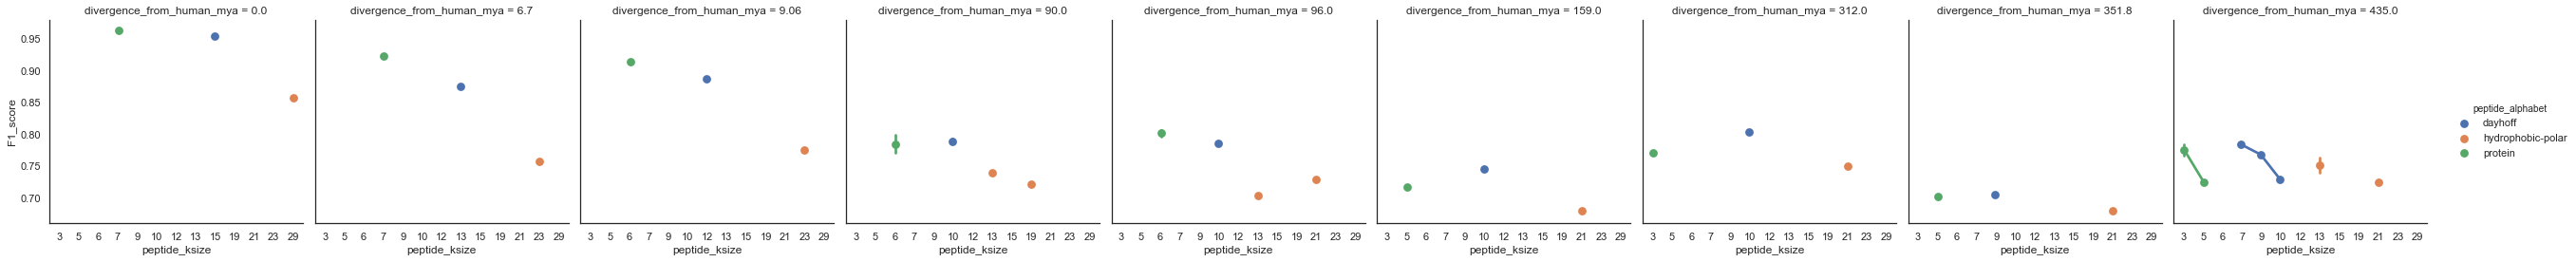

In [187]:
g = sns.catplot(x="peptide_ksize", y="F1_score",hue="peptide_alphabet", col="divergence_from_human_mya",data=bestF1[bestF1["peptide_reference"]=="Homo sapiens QfO"], kind="point", dodge=True, height=4, aspect=1);